# Clustering

Agrupar datos o clustering hace referencia a una buena cantidad de técnicas no supervisadas usadas encontrar patrones o grupos (clusters) dentro de un conjunto de observaciones. La idea es particionar los datos de forma que, las observaciones que están dentro de un mismo grupo, son similares entre ellas y las observaciones de datos en diferentes grupos son distintos. 

Las aplicaciones del clustering en diferentes disciplinas (bioestadística, marketing…) permiten realizar tareas como segmentación de clientes o individuos, compresión de datos, entre otros. Hay una multitud de variantes y adaptaciones de sus métodos y algoritmos, sin embargo, pueden diferenciarse tres grupos principales:

 * **Partitioning Clustering**: Este tipo de algoritmos requieren que el usuario especifique de antemano el número de clusters que se van a crear (K-means, K-medoids, CLARA).

* **Hierarchical Clustering**: Este tipo de algoritmos no requieren que el usuario especifique de antemano el número de clusters. (agglomerative clustering, divisive clusterig).

* **Métodos que combinan o modifican los anteriores**: (hierarchical K-means, fuzzy clustering, model based clustering y density based clustering).

La librería de python scikit-learn ofrece implementaciones eficientes de varias técnicas de agrupamiento. Esta figura muestra cómo distintos algoritmos se comportan con varios tipos de datos.

![tabla](https://raw.githubusercontent.com/madcentral/metodosestadisticos/master/images/clusters.jpg)

## Distancia

Todos los métodos de clustering tienen una cosa en común, para poder llevar a cabo las agrupaciones necesitan definir y cuantificar la similitud entre las observaciones. El término distancia se emplea dentro del contexto del clustering como cuantificación de la similitud o diferencia entre observaciones. Si se representan las observaciones en un espacio p dimensional, siendo p el número de variables asociadas a cada observación, cuando más se asemejen dos observaciones más próximas estarán, de ahí que se emplee el término distancia. La característica que hace del clustering un método adaptable a escenarios muy diversos es que puede emplear cualquier tipo de distancia, lo que permite al investigador escoger la más adecuada para el estudio en cuestión. A continuación, se describen algunas de las más utilizadas. 

* Distancia Euclidea
 $$ d_{euc}(p,q) = \sqrt{(x_p - x_q)^2 + (y_p - y_q)^2}$$
 
* Distancia de Manhatan
$$d_{man}(p,q) = \sum_{i=1}^n |(p_i - q_i)|$$

* Correlación
$$d_{cor}(p,q) = 1 - \text{correlacion}(p,q) $$

* Mahalanobis
$$d_{mah}(p,q) = \sqrt{(p-q)^T\Sigma^{-1}(p-q)} $$


Otras métricas en Python ver [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

## K-means

 K-Means agrupa los datos tratando de separar muestras en K grupos con la menor varianza interna posible. El valor K es especificado por el investigador. El objetivo es minimizar la suma de las varianzas internas de los diferentes clusters:
 
 **Algoritmo**
 
 1. Asignar aleatoriamente un número entre 1 y K a cada observación. Esto sirve como asignación inicial aleatoria de las observaciones a los clusters.

2. Iterar los siguientes pasos hasta que la asignación de las observaciones a los clusters no cambie o se alcance un número máximo de iteraciones establecido por el usuario.

    1. Para cada uno de los clusters calcular su centroide. Entendiendo por centroide la posición definida por la media de cada una de las dimensiones (variables) de las observaciones que forman el cluster. Aunque no es siempre equivalente, puede entenderse como el centro de gravedad.

    2. Asignar cada observación al cluster cuyo centroide está más próximo.
    
Este algoritmo garantiza que, en cada paso, se reduzca la intra-varianza total de los clusters hasta alcanzar un óptimo local. La siguiente imagen muestra cómo van cambiando las asignaciones de las observaciones a medida que se ejecuta cada paso del algoritmo.

![kmeans](https://raw.githubusercontent.com/madcentral/metodosestadisticos/master/images/kmeans.jpg)



Implementación:


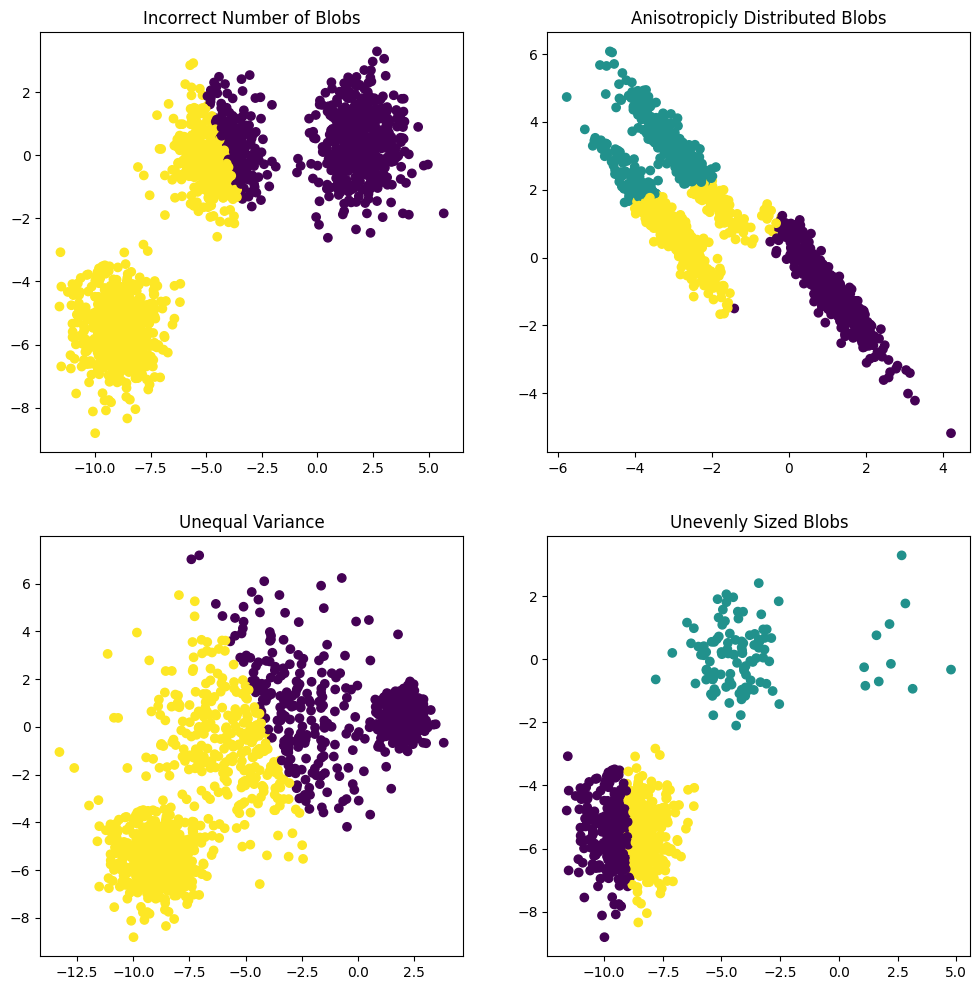

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
model_cluster=KMeans(n_clusters=2, random_state=random_state)
model_cluster.fit(X)
y_pred = model_cluster.predict(X)


plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
#y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
y_pred=model_cluster.predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [3]:
import joblib

joblib.dump('model_cluster','mi_primer_cluster.gz')

['mi_primer_cluster.gz']